## Duplicate pic using CNN

In [ ]:
!pip install imagededup

     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 17.3 MB 406 kB/s 
     |████████████████████████████████| 4.4 MB 42.3 MB/s 
     |████████████████████████████████| 2.1 MB 40.8 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: PyWavelets
    Found existing installation: PyWavelets 1.2.0
    Uninstalling PyWavelets-1.2.0:
      Successfully uninstalled PyWavelets-1.2.0
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.18.2 requires numpy>=1.17, but you have numpy 1.16.6 which is incompatible.
scikit-image 0.18.3 requires PyWavelets

In [ ]:
from imagededup.methods import CNN
from imagededup.utils import plot_duplicates
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 10)

In [ ]:
plt.rcParams['figure.figsize'] = (30, 20)

In [ ]:
import pandas as pd
from google.colab import files
import io
from IPython.display import Image
from google.colab import drive
import zipfile
import os
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import plotly.graph_objects as go

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Import Warnings 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
# Import tensorflow as the backend for Keras
from keras import backend as K
# K.set_image_dim_ordering('tf')
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
# from keras.optimizers import SGD,RMSprop,adam
from keras.callbacks import TensorBoard
# Import required libraries for cnfusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

In [ ]:
cnn = CNN()

17235968/17225924 [==============================] - 0s 0us/step


2022-01-03 17:07:23,598: INFO Initialized: MobileNet pretrained on ImageNet dataset sliced at last conv layer and added GlobalAveragePooling


In [ ]:
###input image
uploaded = files.upload()

data = zipfile.ZipFile(io.BytesIO(uploaded['testing_images.zip']), 'r')

Saving testing_images.zip to testing_images.zip


In [ ]:
data.extractall()
data.printdir()

File Name                                             Modified             Size
testing_images/1NWL9kdndq8Midbxw7jcVtHmFfpFcM.jpg 2018-10-11 16:15:14        62122
testing_images/1NWL9n4x8ByXa7EriXTDPUFy4tzcdb.jpg 2018-10-11 16:15:16        70699
testing_images/1NWL9noWgp5d39PSTiBCHFMSogkZec.jpg 2018-10-11 16:15:16       123805
testing_images/1NWL9pgl79VZzJTFOZ0w0IB7fDdDiv.jpg 2018-10-11 16:15:16        90106
testing_images/1NWL9pnXotfdmnUrmJAJDccVd0OaEd.jpg 2018-10-11 16:15:16        82170
testing_images/1NWL9sFQLbcz1KdZ4r2mlLKYO6oB7i.jpg 2018-10-11 16:15:16       108631
testing_images/1NWL9sIFxhUQlWBEQTQu1ERHPqsM1R.jpg 2018-10-11 16:15:16       108836
testing_images/1NWL9sIje7EuTz0wdCrOHIb9mCNLSJ.jpg 2018-10-11 16:15:16       111098
testing_images/1NWL9sw95AeZi0iU8RwSSVo6SAVN4c.jpg 2018-10-11 16:15:16        89615
testing_images/1NWL9sY1jNGru3oWoLTn9ZbUOgQMEL.jpg 2018-10-11 16:15:16       173545
testing_images/1NWL9tF6yfwVOQWZ0P2qV0XKCNhiLw.jpg 2018-10-11 16:15:16       123662
testing

In [ ]:
image_dir = 'testing_images/'

In [ ]:
encodings = cnn.encode_images(image_dir=image_dir)

2022-01-03 17:37:36,610: INFO Start: Image encoding generation


9/9 [==============================] - 31s 3s/step


2022-01-03 17:38:09,432: INFO End: Image encoding generation


In [ ]:
duplicates = cnn.find_duplicates(encoding_map=encodings, scores = True)

2022-01-03 17:38:27,140: INFO Start: Calculating cosine similarities...
2022-01-03 17:38:27,163: INFO End: Calculating cosine similarities.


In [ ]:
len(duplicates)

527

In [ ]:
dup_list = []
for key, value in duplicates.items():
   if len(value) > 0:
     dup_list.append(key)
    # print(key + ",")

In [ ]:
dup_list

['1NWLA1SWYmk2gyzfCEfiAooSiLF9Un.jpg',
 '1NWLA1T4InkNDBxYFo3N17HnAPWKzK.jpg',
 '1NWLA61MaJFWFMJ9KinVqlGLpHexAz.jpg',
 '1NWLA6MdztRnXZsVXud8LG69BgnUOP.jpg',
 '1NWLAD2BYXu3xkLnpaOjVi1ucbwMKR.jpg',
 '1NWLAD2ESlxvPBYnrix7xNhzgrHPtm.jpg',
 '1NWLAILSQQpg1V3KuedMCGuLsjHezB.jpg',
 '1NWLAILVq31utvHQywPA7kurWPDvqX.jpg',
 '1NWLAhUffjuX27isGdsGKm1AEksyPs.jpg',
 '1NWLB7RGGQpRqcz6cjX6qoSuvtUi2H.jpg',
 '1NWLB7RMhuLp1RhCc6xiIlYJn8mar8.jpg',
 '1NWLBSZ63HY2em8BpcyZfsg4ajCsM3.jpg',
 '1NWLBUD66PQWsuljbakbZVZle1qP9i.jpg',
 '1NWLBe8v8mUF1tizfOwUwV7Unq9nVx.jpg',
 '1NWLBe9eWYhqZzZFUm6zKNQNr6S8EO.jpg',
 '1NWLBe9nwgRB4ryX4U9USXKhHsnSia.jpg',
 '1NWLBvMpfs4nugbfYaUy19Dr50FKWE.jpg',
 '1NWLC7Qiz1oCyj3tgGOM0lWhhD6GMJ.jpg',
 '1NWLC9NlXa89hGb75sIRMDZL4hL1m9.jpg',
 '1NWLCB0DiLWIOpeiTU90lMrSRTnhRH.jpg',
 '1NWLCKV9QRrRNMEpLL3fmCyeffpnh9.jpg',
 '1NWLCkz2TAyzofDz6CpEIzz0t8TETb.jpg',
 '1NWLCkzy3NHgficNTsF21j9ZVARFXD.jpg',
 '1NWLCnB4Y2RUZCEcYbHFbbXbW1y5sU.jpg',
 '1NWLCnE7RA76HWJY2CwGLa29u5kSzZ.jpg',
 '1NWLCqAiUsyafcDgtsA7I8U

In [ ]:
####find promo dup list
uploaded = files.upload()
df_test_result = pd.read_csv(io.BytesIO(uploaded['df_test_lmwn_result_weiiii.csv']))

Saving df_test_lmwn_result_weiiii.csv to df_test_lmwn_result_weiiii.csv


In [ ]:
df_good_promo = df_test_result[df_test_result['y_pred']<0.5]

In [ ]:
good_promo_pic = list(df_good_promo['Pic'])

In [ ]:
dup_promo_list = []
for i in good_promo_pic:
  if i in dup_list :
    dup_promo_list.append(i)

In [ ]:
dup_promo_list

['1NWLCB0DiLWIOpeiTU90lMrSRTnhRH.jpg',
 '1NWLCqBBnbQraswzvElD2EmVKEtYZv.jpg',
 '1NWLCnE7RA76HWJY2CwGLa29u5kSzZ.jpg',
 '1NWLA61MaJFWFMJ9KinVqlGLpHexAz.jpg',
 '1NWLA6MdztRnXZsVXud8LG69BgnUOP.jpg',
 '1NWLA1T4InkNDBxYFo3N17HnAPWKzK.jpg',
 '1NWLA1SWYmk2gyzfCEfiAooSiLF9Un.jpg',
 '1NWLC7Qiz1oCyj3tgGOM0lWhhD6GMJ.jpg',
 '1NWLBe9eWYhqZzZFUm6zKNQNr6S8EO.jpg',
 '1NWLBe9nwgRB4ryX4U9USXKhHsnSia.jpg',
 '1NWLBe8v8mUF1tizfOwUwV7Unq9nVx.jpg',
 '1NWLAD2BYXu3xkLnpaOjVi1ucbwMKR.jpg',
 '1NWLAD2ESlxvPBYnrix7xNhzgrHPtm.jpg',
 '1NWLD9ygy2biF3dUIzuQ4IOqN4EnA2.jpg',
 '1NWLDAE9U7AtBphTXNEcv9iaoawQiN.jpg']

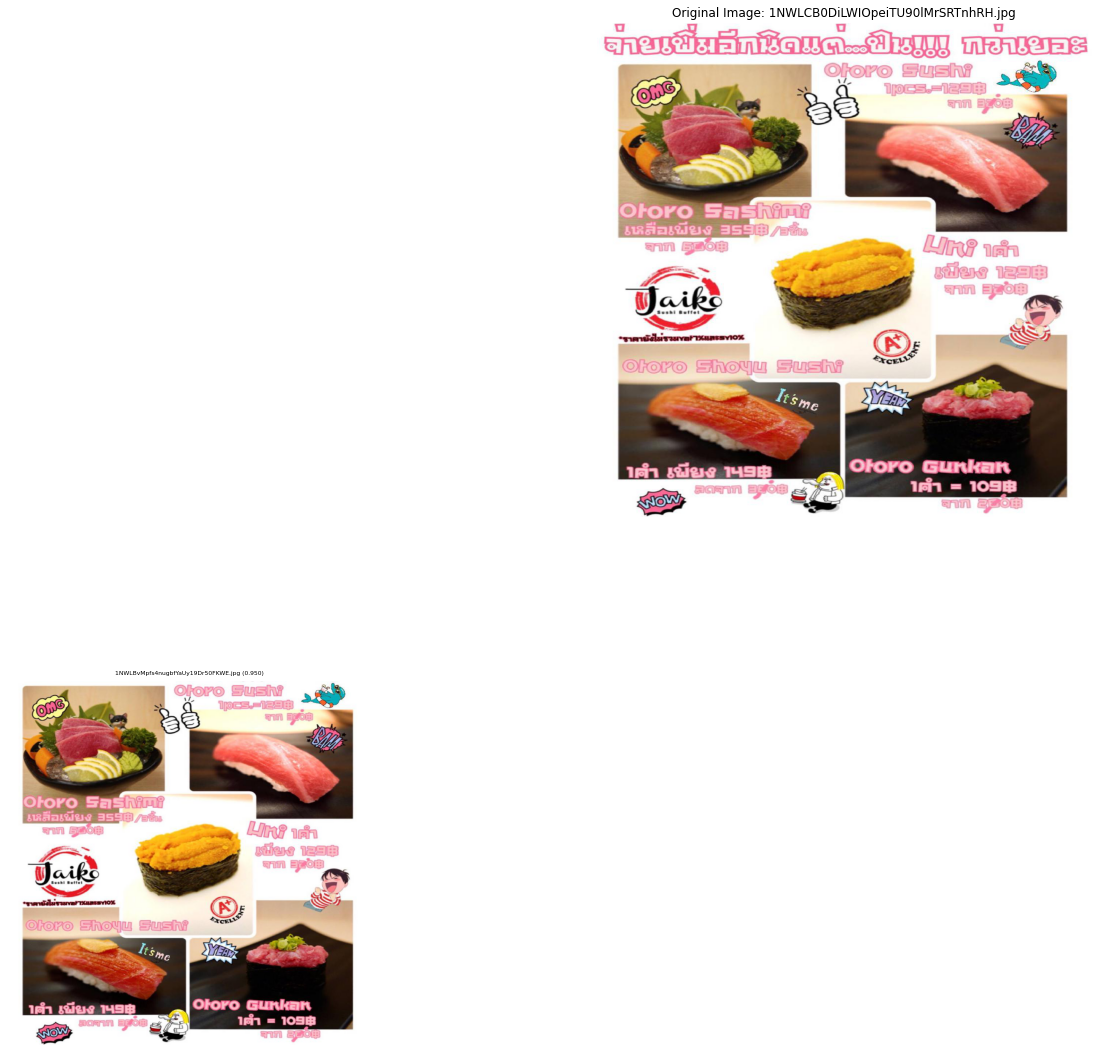

In [ ]:
plot_duplicates(image_dir=image_dir, 
                duplicate_map=duplicates, 
                filename='1NWLCB0DiLWIOpeiTU90lMrSRTnhRH.jpg')

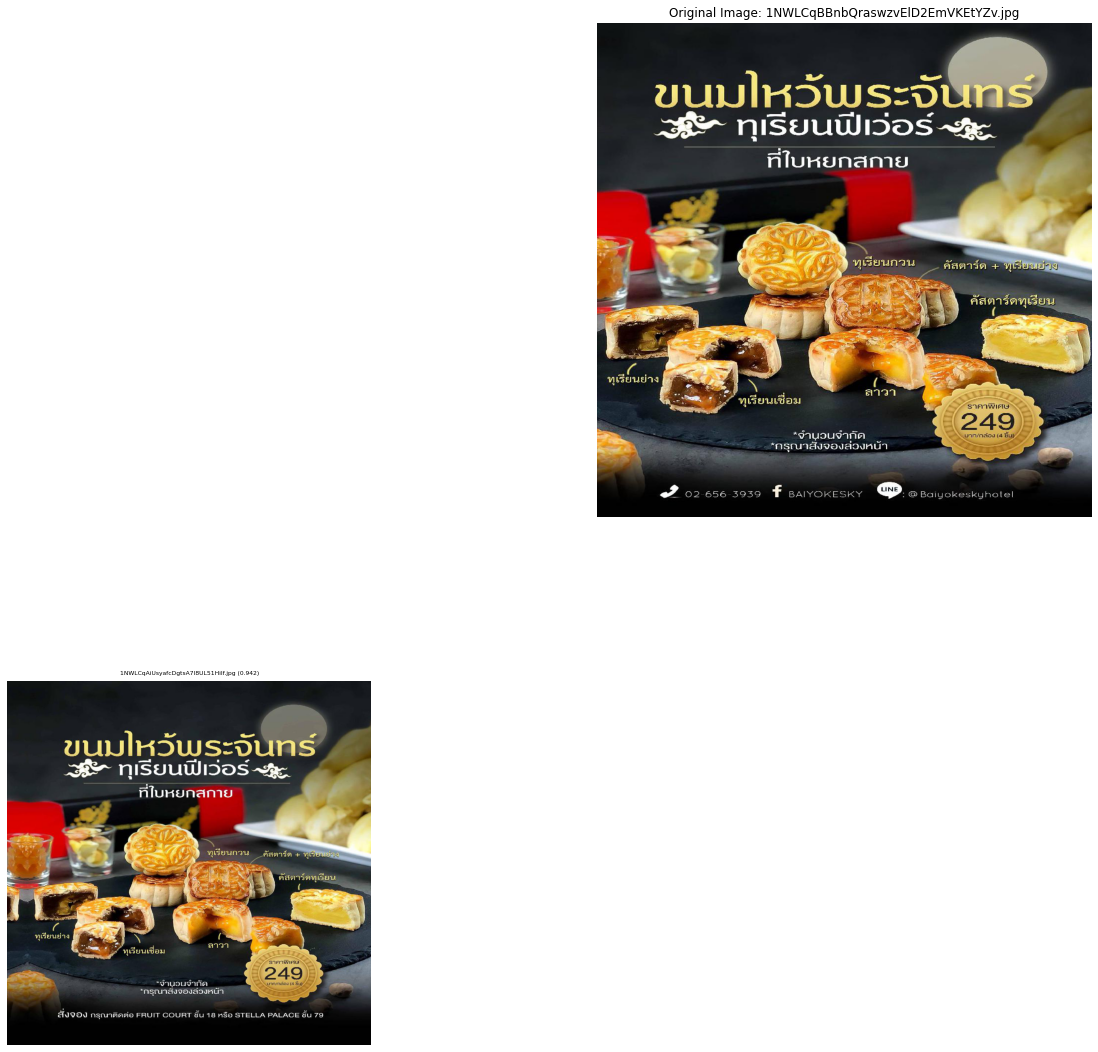

In [ ]:
plot_duplicates(image_dir=image_dir, 
                duplicate_map=duplicates, 
                filename='1NWLCqBBnbQraswzvElD2EmVKEtYZv.jpg')

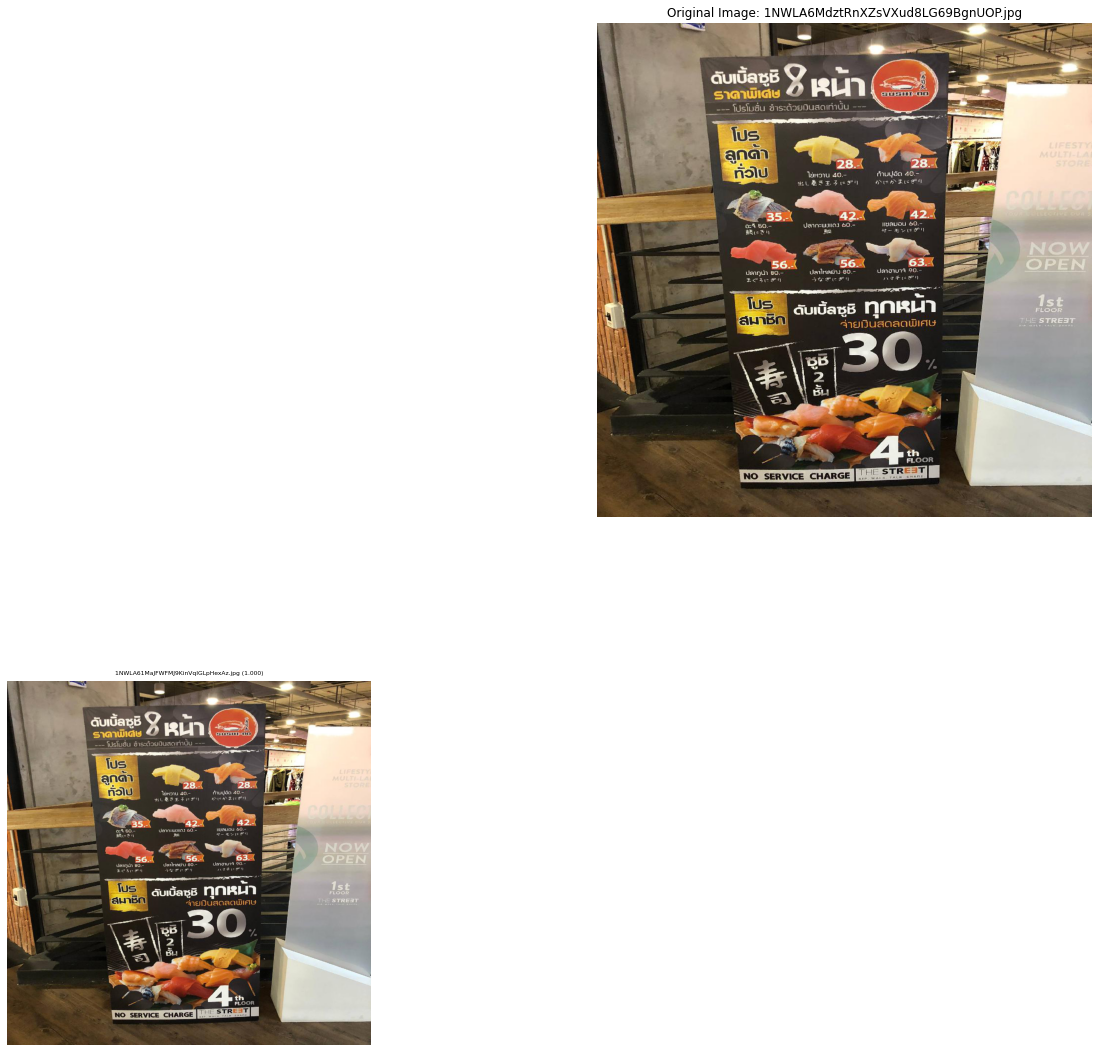

In [ ]:
plot_duplicates(image_dir=image_dir, 
                duplicate_map=duplicates, 
                filename='1NWLA6MdztRnXZsVXud8LG69BgnUOP.jpg')

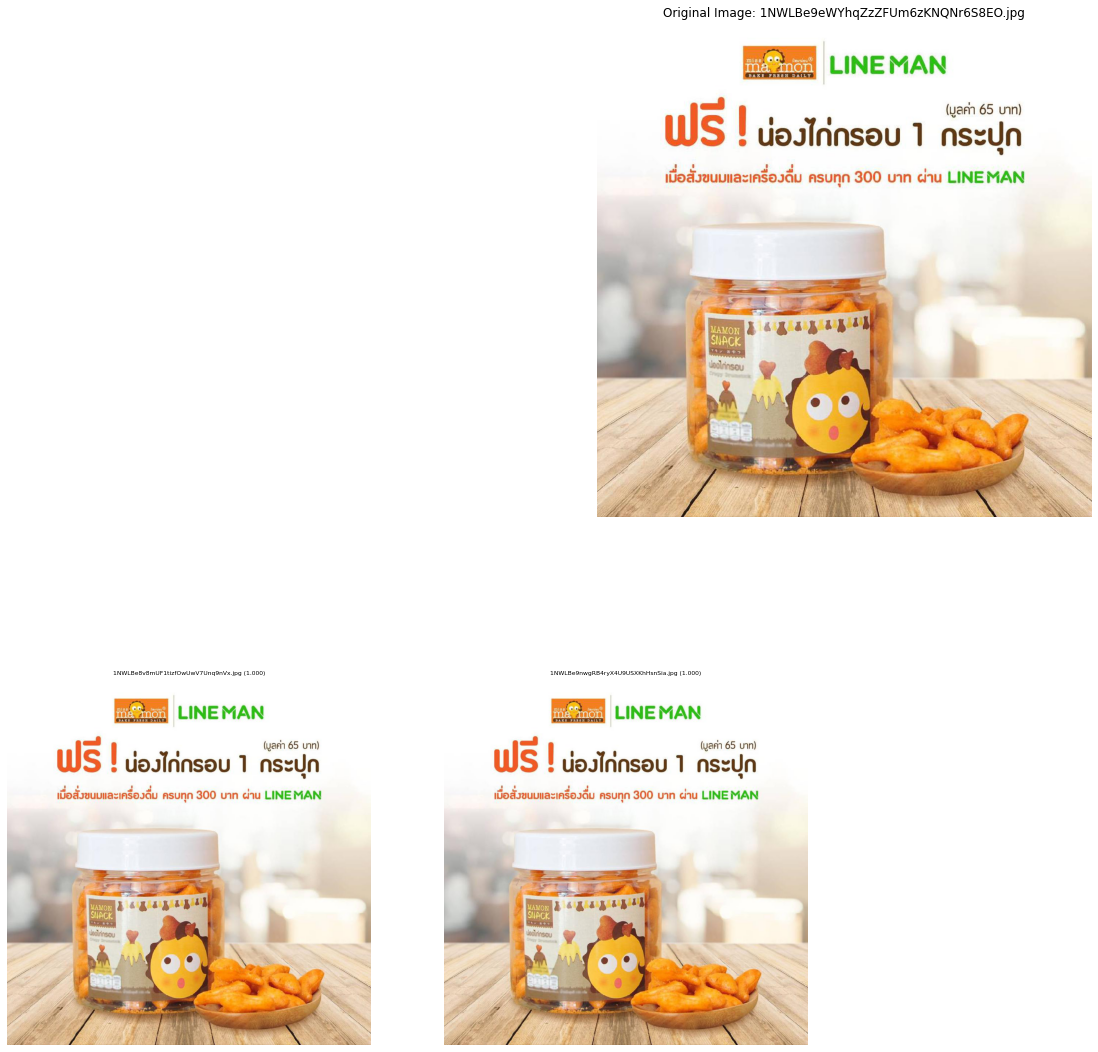

In [ ]:
plot_duplicates(image_dir=image_dir, 
                duplicate_map=duplicates, 
                filename='1NWLBe9eWYhqZzZFUm6zKNQNr6S8EO.jpg')

### VGG Cosine

In [ ]:
import os
import matplotlib.pyplot as plt
import PIL.Image as Image
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

In [ ]:
img_list = os.listdir(image_dir)

In [ ]:
print('The number of images: ', len(img_list))
print('The number of promo images: ', len(good_promo_pic))

The number of images:  527
The number of promo images:  264


In [ ]:
# consine similarity
def cosine_similarity(ratings):
    sim = ratings.dot(ratings.T)
    norms = np.array([np.sqrt(np.diagonal(sim))])
    return (sim / norms / norms.T)

In [ ]:
y_test = []
x_test = []
for file_name in good_promo_pic:
    abs_file_path = 'testing_images/' + file_name
    img = image.load_img(abs_file_path, target_size=(224, 224))
    y_test.append(file_name)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    if len(x_test) > 0:
        x_test = np.concatenate((x_test, x))
    else:
        x_test = x

In [ ]:
len(y_test)

264

In [ ]:
###extract features from pic
# convert input to VGG format
x_test = preprocess_input(x_test)

# include_top=False: exclude top(last) 3 fully-connected layers. get features dim=(1,7,7,512)
model = VGG16(weights='imagenet', include_top=False)

# use VGG to extract features
features = model.predict(x_test)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# flatten as one dimension
features_compress = features.reshape(len(y_test), 7 * 7 * 512)

# compute consine similarity
cos_sim = cosine_similarity(features_compress)

In [ ]:
# random choose 5 samples to test
inputNos = np.random.choice(len(y_test), 30, replace=False)

for inputNo in inputNos:
    # select two best similar images 
    top = np.argsort(-cos_sim[inputNo], axis=0)[1:3]
    recommend = [y_test[i] for i in top]
    output = 'input: \'{}\', recommend: {}'.format(inputNo + 1, recommend)
    print(output)

input: '243', recommend: ['1NWLAD2ESlxvPBYnrix7xNhzgrHPtm.jpg', '1NWLBHQQoOj9a8qud1TZzpucJ7Brl1.jpg']
input: '247', recommend: ['1NWL9noWgp5d39PSTiBCHFMSogkZec.jpg', '1NWLCWP6VbwQr2jDKLDOdcGV3SeAqX.jpg']
input: '191', recommend: ['1NWLCUpb7pcLfzCuIu0cuNK0cs0xBn.jpg', '1NWLAjTxYOg7mosn2FfgGmRzITDql5.jpg']
input: '103', recommend: ['1NWL9sY1jNGru3oWoLTn9ZbUOgQMEL.jpg', '1NWLBT9qt6U3U9OjM52FTvcoA8ivDp.jpg']
input: '172', recommend: ['1NWLCAahEoyyHRxlEu9aEBSfb3Zhdq.jpg', '1NWLC9ka4YxVxuFqPUPvVqemRWm6ix.jpg']
input: '87', recommend: ['1NWLC9ka4YxVxuFqPUPvVqemRWm6ix.jpg', '1NWLCwuXGJ4tN3eQsjDiD9zpDB9qgU.jpg']
input: '40', recommend: ['1NWLCRH2wbbmaOVkAFU0vH0EnAVudx.jpg', '1NWLCRHlIGc0WRzxe8kpEdcMALS7JK.jpg']
input: '224', recommend: ['1NWLCWP6VbwQr2jDKLDOdcGV3SeAqX.jpg', '1NWLBugyokyD2CBd3yCwuHwp53qBQI.jpg']
input: '246', recommend: ['1NWLC9ka4YxVxuFqPUPvVqemRWm6ix.jpg', '1NWLD4DO9NVWH7FiCgO7SuWQC7T7wI.jpg']
input: '242', recommend: ['1NWLCtuTUz13CDniCR4Ih9OnUXy2Yl.jpg', '1NWLCFj3nL8Wkr0DSuq

In [ ]:
np.random.choice(len(y_test), 10, replace=False)

array([213, 135, 170, 208,  38,  47, 263, 103,  49, 148])

In [ ]:
####combine text data to compare consine sim

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df_good_promo

,y_pred,PromotionId,description,Unnamed: 3,Pic,alcohol_bottle,human,cap_screen,pure_food,store_front,promo_pic,pure_drink,des_length,ไฮเนเก้น,เบียร์,beer,cocktail,ค๊อกเทล,alcohol,wine,ไวน์,ขวด,กระป๋อง,แอลกอ,สิงห์,ช้าง,heineken,เหล้า,soju,โซจู,asahi,อาซาฮี,แก้ว,เหยือก,เย็น,น้ำแข็ง,singha,chang,lager,hop,...,ร้าน,อาหาร,percent,เปอร์เซ็นต์,เปอเซน,sale,coffee,ใหม่,เฉพาะ,เมื่อ,เซต,คู่,เซตคู่,พนักงาน,ขึ้นไป,สุด,นี้,vip,robinhood,ฉลอง,เทศกาล,สาขา,วันเกิด,เปิด,จัดเต็ม,แนะนำ,กิโล,ราคา,เริ่มต้น,เปิดตัว,collect,stamp,loyalty,point,รับ,โทร,จับคู่,เช็คอิน,weekend,y_pred.1
263,0.484575,1NWLAjKUD2KjE4ZPVBtVxEQSl2wOWT,NaN,NaN,1NWLAjKUD2KjE4ZPVBtVxEQSl2wOWT.jpg,0.000347,1.678540e-04,2.550000e-07,0.070733,0.906509,0.009738,0.012505,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.484575
264,0.467785,1NWLCNO4PNXZkMj9bIizTckwvvf0w3,craft intersect 2nd anniversary,NaN,1NWLCNO4PNXZkMj9bIizTckwvvf0w3.jpg,0.080238,7.580000e-07,2.050000e-09,0.002284,0.290526,0.626946,0.000004,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.467785
265,0.466019,1NWLCUQRIZEAdWVn1J2Ov56tAAeH9E,NaN,NaN,1NWLCUQRIZEAdWVn1J2Ov56tAAeH9E.jpg,0.046745,1.584971e-03,2.300000e-07,0.014156,0.038980,0.898531,0.000003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.466019
266,0.463089,1NWLBmW3pJ78PN2iOPP2B659JQQCEO,bae b q คู่กับ budweiser 1เหยือก,NaN,1NWLBmW3pJ78PN2iOPP2B659JQQCEO.jpg,0.189499,6.882485e-01,2.308168e-03,0.097406,0.004656,0.005837,0.012045,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.463089
267,0.453486,1NWLBOeQzVDmvcoMhk0bNZ07lTGqbu,meu republic รับฟรี น้ำผลไม้แยกกาก 1 แก้ว เมื่...,NaN,1NWLBOeQzVDmvcoMhk0bNZ07lTGqbu.jpg,0.004244,2.257910e-03,9.880000e-06,0.964743,0.000145,0.028548,0.000053,199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.453486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,0.000076,1NWLD9ygy2biF3dUIzuQ4IOqN4EnA2,โปรพิเศษ papa's prime shrimp signature burger ...,NaN,1NWLD9ygy2biF3dUIzuQ4IOqN4EnA2.jpg,0.002509,4.560000e-05,6.090000e-10,0.404767,0.390619,0.201373,0.000687,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.000076
523,0.000076,1NWLDAE9U7AtBphTXNEcv9iaoawQiN,โปรพิเศษ papa's prime shrimp signature burger ...,NaN,1NWLDAE9U7AtBphTXNEcv9iaoawQiN.jpg,0.002509,4.560000e-05,6.090000e-10,0.404767,0.390619,0.201373,0.000687,155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.000076
524,0.000068,1NWL9sw95AeZi0iU8RwSSVo6SAVN4c,ลูกค้า ktc รับสิทธิพิเศษ ที่ haagendazs ทุกสาข...,NaN,1NWL9sw95AeZi0iU8RwSSVo6SAVN4c.jpg,0.230032,3.980000e-05,1.390000e-07,0.006762,0.151254,0.611652,0.000260,194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0.000068
525,0.000060,1NWL9vmW7AAEFQNRhwRVPfUexdnwCh,ฉลองเปิดโซนใหม่ healthy shabu sukiyaki กับ โ...,NaN,1NWL9vmW7AAEFQNRhwRVPfUexdnwCh.jpg,0.002784,6.718068e-01,2.709062e-03,0.096812,0.121087,0.070332,0.034469,167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000060


In [ ]:
df_feature = df_good_promo.drop(columns=['Pic','PromotionId','description','Unnamed: 3','y_pred.1'])

In [ ]:
cosine_result = cosine_similarity(df_feature)

In [ ]:
cosine_result

array([[1.00000000e+00, 1.55239860e-02, 2.59257753e-01, ...,
        7.18359256e-04, 6.84633627e-04, 9.69787465e-05],
       [1.55239860e-02, 1.00000000e+00, 2.53113171e-02, ...,
        9.98785381e-01, 9.98638746e-01, 9.98289298e-01],
       [2.59257753e-01, 2.53113171e-02, 1.00000000e+00, ...,
        2.87759472e-03, 4.16126342e-04, 3.03483456e-04],
       ...,
       [7.18359256e-04, 9.98785381e-01, 2.87759472e-03, ...,
        1.00000000e+00, 9.99383060e-01, 9.99060829e-01],
       [6.84633627e-04, 9.98638746e-01, 4.16126342e-04, ...,
        9.99383060e-01, 1.00000000e+00, 9.99041668e-01],
       [9.69787465e-05, 9.98289298e-01, 3.03483456e-04, ...,
        9.99060829e-01, 9.99041668e-01, 1.00000000e+00]])

In [ ]:
df_cosine = pd.DataFrame(cosine_result)

In [ ]:
df_cosine = df_cosine.reset_index(drop=True)
df_good_promo = df_good_promo.reset_index(drop=True)

In [ ]:
df_cosine = df_cosine.reset_index(drop=False)
df_good_promo = df_good_promo.reset_index(drop=False)

In [ ]:
df_good_promo

,index,y_pred,PromotionId,description,Unnamed: 3,Pic,alcohol_bottle,human,cap_screen,pure_food,store_front,promo_pic,pure_drink,des_length,ไฮเนเก้น,เบียร์,beer,cocktail,ค๊อกเทล,alcohol,wine,ไวน์,ขวด,กระป๋อง,แอลกอ,สิงห์,ช้าง,heineken,เหล้า,soju,โซจู,asahi,อาซาฮี,แก้ว,เหยือก,เย็น,น้ำแข็ง,singha,chang,lager,...,ร้าน,อาหาร,percent,เปอร์เซ็นต์,เปอเซน,sale,coffee,ใหม่,เฉพาะ,เมื่อ,เซต,คู่,เซตคู่,พนักงาน,ขึ้นไป,สุด,นี้,vip,robinhood,ฉลอง,เทศกาล,สาขา,วันเกิด,เปิด,จัดเต็ม,แนะนำ,กิโล,ราคา,เริ่มต้น,เปิดตัว,collect,stamp,loyalty,point,รับ,โทร,จับคู่,เช็คอิน,weekend,y_pred.1
0,0,0.484575,1NWLAjKUD2KjE4ZPVBtVxEQSl2wOWT,NaN,NaN,1NWLAjKUD2KjE4ZPVBtVxEQSl2wOWT.jpg,0.000347,1.678540e-04,2.550000e-07,0.070733,0.906509,0.009738,0.012505,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.484575
1,1,0.467785,1NWLCNO4PNXZkMj9bIizTckwvvf0w3,craft intersect 2nd anniversary,NaN,1NWLCNO4PNXZkMj9bIizTckwvvf0w3.jpg,0.080238,7.580000e-07,2.050000e-09,0.002284,0.290526,0.626946,0.000004,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.467785
2,2,0.466019,1NWLCUQRIZEAdWVn1J2Ov56tAAeH9E,NaN,NaN,1NWLCUQRIZEAdWVn1J2Ov56tAAeH9E.jpg,0.046745,1.584971e-03,2.300000e-07,0.014156,0.038980,0.898531,0.000003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.466019
3,3,0.463089,1NWLBmW3pJ78PN2iOPP2B659JQQCEO,bae b q คู่กับ budweiser 1เหยือก,NaN,1NWLBmW3pJ78PN2iOPP2B659JQQCEO.jpg,0.189499,6.882485e-01,2.308168e-03,0.097406,0.004656,0.005837,0.012045,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.463089
4,4,0.453486,1NWLBOeQzVDmvcoMhk0bNZ07lTGqbu,meu republic รับฟรี น้ำผลไม้แยกกาก 1 แก้ว เมื่...,NaN,1NWLBOeQzVDmvcoMhk0bNZ07lTGqbu.jpg,0.004244,2.257910e-03,9.880000e-06,0.964743,0.000145,0.028548,0.000053,199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.453486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,259,0.000076,1NWLD9ygy2biF3dUIzuQ4IOqN4EnA2,โปรพิเศษ papa's prime shrimp signature burger ...,NaN,1NWLD9ygy2biF3dUIzuQ4IOqN4EnA2.jpg,0.002509,4.560000e-05,6.090000e-10,0.404767,0.390619,0.201373,0.000687,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.000076
260,260,0.000076,1NWLDAE9U7AtBphTXNEcv9iaoawQiN,โปรพิเศษ papa's prime shrimp signature burger ...,NaN,1NWLDAE9U7AtBphTXNEcv9iaoawQiN.jpg,0.002509,4.560000e-05,6.090000e-10,0.404767,0.390619,0.201373,0.000687,155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.000076
261,261,0.000068,1NWL9sw95AeZi0iU8RwSSVo6SAVN4c,ลูกค้า ktc รับสิทธิพิเศษ ที่ haagendazs ทุกสาข...,NaN,1NWL9sw95AeZi0iU8RwSSVo6SAVN4c.jpg,0.230032,3.980000e-05,1.390000e-07,0.006762,0.151254,0.611652,0.000260,194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0.000068
262,262,0.000060,1NWL9vmW7AAEFQNRhwRVPfUexdnwCh,ฉลองเปิดโซนใหม่ healthy shabu sukiyaki กับ โ...,NaN,1NWL9vmW7AAEFQNRhwRVPfUexdnwCh.jpg,0.002784,6.718068e-01,2.709062e-03,0.096812,0.121087,0.070332,0.034469,167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000060


In [ ]:
df_similar_promo = df_good_promo.merge(df_cosine,how = 'left' ,on='index')

In [ ]:
df_similar_promo.to_csv('df_similar_promo.csv',encoding='utf-8-sig') 
files.download('df_similar_promo.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>